In [179]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [180]:
%store -r train
%store -r null_vals
%store -r test
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,OpenPorchSF,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,SalePrice,log_SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,61,NaN,NaN,NaN,2,2008,WD,Normal,208500,12.247694
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,5,2007,WD,Normal,181500,12.109011
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,42,NaN,NaN,NaN,9,2008,WD,Normal,223500,12.317167
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,35,NaN,NaN,NaN,2,2006,WD,Abnorml,140000,11.849398
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,84,NaN,NaN,NaN,12,2008,WD,Normal,250000,12.429216


In [181]:
print(train.shape)
print(test.shape)

(1448, 73)
(1459, 71)


In [182]:
categorical_cols = train.select_dtypes(exclude=np.number)
print(categorical_cols.shape)
print(categorical_cols.describe())
print(categorical_cols.dtypes)

(1448, 46)
        MSSubClass MSZoning Street Alley LotShape LandContour Utilities  \
count         1448     1448   1448    90     1448        1448      1448   
unique          15        5      2     2        4           4         2   
top             20       RL   Pave  Grvl      Reg         Lvl    AllPub   
freq           533     1143   1444    49      919        1307      1447   

       LotConfig LandSlope Neighborhood  ... GarageQual GarageCond PavedDrive  \
count       1448      1448         1448  ...       1368       1368       1448   
unique         5         3           25  ...          5          5          3   
top       Inside       Gtl        NAmes  ...         TA         TA          Y   
freq        1044      1375          224  ...       1302       1315       1329   

       PoolQC  Fence MiscFeature MoSold YrSold SaleType SaleCondition  
count       6    279          50   1448   1448     1448          1448  
unique      3      4           4     12      5        9        

## MSSubClass

20     533
60     297
50     142
120     87
30      67
160     63
70      60
80      58
90      52
190     28
85      20
75      15
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
0
20     543
60     276
50     143
120     95
30      70
70      68
160     65
80      60
90      57
190     31
85      28
180      7
75       7
45       6
40       2
150      1
Name: MSSubClass, dtype: int64
0


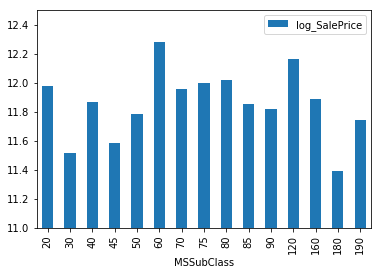

In [183]:
train.pivot_table(index='MSSubClass', 
                         values = 'log_SalePrice', 
                         aggfunc = np.median).plot(kind='bar',ylim=(11,12.5))
print(train.MSSubClass.value_counts())
print(train.MSSubClass.isnull().sum())
print(test.MSSubClass.value_counts())
print(test.MSSubClass.isnull().sum())

In [184]:
print(train.shape)
print(test.shape)

(1448, 73)
(1459, 71)


In [185]:
train = pd.concat([train, pd.get_dummies(train.MSSubClass, drop_first = True)], axis=1)
train = train.drop('MSSubClass', axis=1)
print(train.shape)


(1448, 86)


In [186]:
test = pd.concat([test, pd.get_dummies(test.MSSubClass, drop_first = True)], axis=1)
test = test.drop('MSSubClass', axis=1)
print(test.shape)

(1459, 85)


## MSZoning

RL         1143
RM          216
FV           65
RH           16
C (all)       8
Name: MSZoning, dtype: int64
0


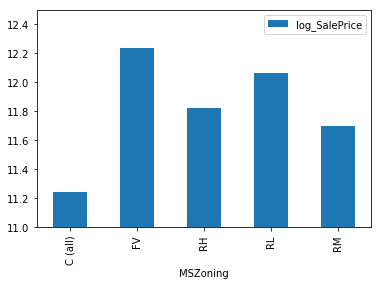

In [187]:
train.pivot_table(index='MSZoning', 
                         values = 'log_SalePrice', 
                         aggfunc = np.median).plot(kind='bar',ylim=(11,12.5))
print(train.MSZoning.value_counts())
print(train.MSZoning.isnull().sum())

In [188]:
train = pd.concat([train, pd.get_dummies(train.MSZoning, drop_first = True)], axis=1)
train = train.drop('MSZoning', axis=1)
print(train.shape)


(1448, 89)


In [189]:
test = pd.concat([test, pd.get_dummies(test.MSZoning, drop_first = True)], axis=1)
test = test.drop('MSZoning', axis=1)
print(test.shape)

(1459, 88)


## Street

Pave    1444
Grvl       4
Name: Street, dtype: int64
0


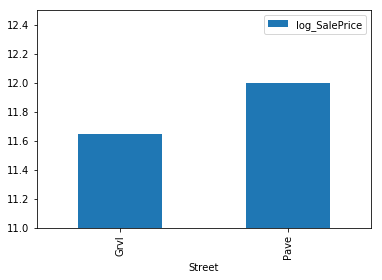

In [190]:
train.pivot_table(index='Street', 
                         values = 'log_SalePrice', 
                         aggfunc = np.median).plot(kind='bar',ylim=(11,12.5))
print(train.Street.value_counts())
print(train.Street.isnull().sum())

In [191]:
train = pd.concat([train, pd.get_dummies(train.Street, drop_first = True)], axis=1)
train = train.drop('Street', axis=1)
print(train.shape)

(1448, 89)


In [192]:
test = pd.concat([test, pd.get_dummies(test.Street, drop_first = True)], axis=1)
test = test.drop('Street', axis=1)
print(test.shape)

(1459, 88)


## Alley

Grvl    49
Pave    41
Name: Alley, dtype: int64
1358


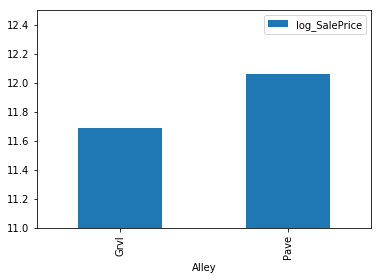

In [193]:
train.pivot_table(index='Alley', 
                         values = 'log_SalePrice', 
                         aggfunc = np.median).plot(kind='bar',ylim=(11,12.5))
print(train.Alley.value_counts())
print(train.Alley.isnull().sum())

In [194]:
train=train.drop('Alley', axis=1)
print(train.shape)

(1448, 88)


In [195]:
test=test.drop('Alley', axis=1)
print(test.shape)

(1459, 87)


## LotShape

Reg    919
IR1    482
IR2     39
IR3      8
Name: LotShape, dtype: int64
0


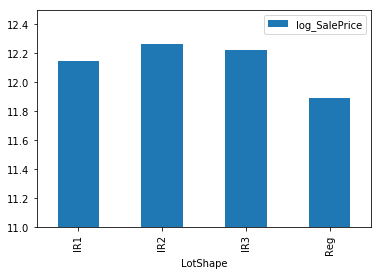

In [196]:
train.pivot_table(index='LotShape', 
                         values = 'log_SalePrice', 
                         aggfunc = np.median).plot(kind='bar',ylim=(11,12.5))
print(train.LotShape.value_counts())
print(train.LotShape.isnull().sum())

In [197]:
#Reducing to binary Regular vs Irregular
def f(x):
 return 1 if x == 'Reg' else 0
train['LotShape'] = train['LotShape'].apply(f)
print(train.LotShape.value_counts())   
print(train.shape)

1    919
0    529
Name: LotShape, dtype: int64
(1448, 88)


In [198]:
def g(x):
 return 1 if x == 'Reg' else 0
test['LotShape'] = test['LotShape'].apply(g)
print(test.LotShape.value_counts())   
print(test.shape)

1    934
0    525
Name: LotShape, dtype: int64
(1459, 87)


## LandContour

Lvl    1307
Bnk      61
HLS      48
Low      32
Name: LandContour, dtype: int64
0


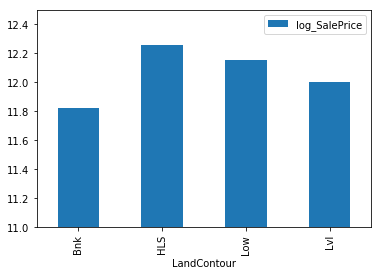

In [199]:
train.pivot_table(index='LandContour', 
                         values = 'log_SalePrice', 
                         aggfunc = np.median).plot(kind='bar',ylim=(11,12.5))
print(train.LandContour.value_counts())
print(train.LandContour.isnull().sum())

In [200]:
train = pd.concat([train, pd.get_dummies(train.LandContour, drop_first = True)], axis=1)
train = train.drop('LandContour', axis=1)
print(train.shape)

(1448, 90)


In [201]:
test = pd.concat([test, pd.get_dummies(test.LandContour, drop_first = True)], axis=1)
test = test.drop('LandContour', axis=1)
print(test.shape)

(1459, 89)


## Utilities

AllPub    1447
NoSeWa       1
Name: Utilities, dtype: int64
0


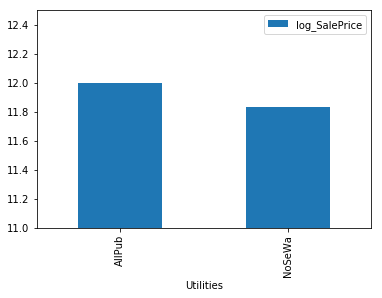

In [202]:
train.pivot_table(index='Utilities', 
                         values = 'log_SalePrice', 
                         aggfunc = np.median).plot(kind='bar',ylim=(11,12.5))
print(train.Utilities.value_counts())
print(train.Utilities.isnull().sum())

In [203]:
# dropping utilities

In [204]:
train = train.drop('Utilities', axis=1)
print(train.shape)

(1448, 89)


In [205]:
test = test.drop('Utilities', axis=1)
print(test.shape)

(1459, 88)


## LotConfig

Inside     1044
Corner      260
CulDSac      93
FR2          47
FR3           4
Name: LotConfig, dtype: int64
0


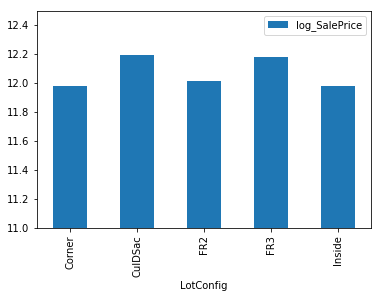

In [206]:
train.pivot_table(index='LotConfig', 
                         values = 'log_SalePrice', 
                         aggfunc = np.median).plot(kind='bar',ylim=(11,12.5))
print(train.LotConfig.value_counts())
print(train.LotConfig.isnull().sum())

In [207]:
train = pd.concat([train, pd.get_dummies(train.LotConfig, drop_first = True)], axis=1)
train = train.drop('LotConfig', axis=1)
print(train.shape)

(1448, 92)


In [208]:
test = pd.concat([test, pd.get_dummies(test.LotConfig, drop_first = True)], axis=1)
test = test.drop('LotConfig', axis=1)
print(test.shape)

(1459, 91)


## LandSlope

Gtl    1375
Mod      63
Sev      10
Name: LandSlope, dtype: int64
0


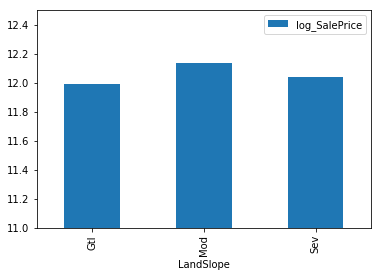

In [209]:
train.pivot_table(index='LandSlope', 
                         values = 'log_SalePrice', 
                         aggfunc = np.median).plot(kind='bar',ylim=(11,12.5))
print(train.LandSlope.value_counts())
print(train.LandSlope.isnull().sum())

In [210]:
train = pd.concat([train, pd.get_dummies(train.LandSlope, drop_first = True)], axis=1)
train = train.drop('LandSlope', axis=1)
print(train.shape)


(1448, 93)


In [211]:
test = pd.concat([test, pd.get_dummies(test.LandSlope, drop_first = True)], axis=1)
test = test.drop('LandSlope', axis=1)
print(test.shape)

(1459, 92)


## Neighborhood

NAmes      224
CollgCr    150
OldTown    111
Edwards     98
Somerst     86
Gilbert     79
NridgHt     76
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     48
NoRidge     41
Timber      36
IDOTRR      35
ClearCr     27
StoneBr     25
SWISU       25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64
0


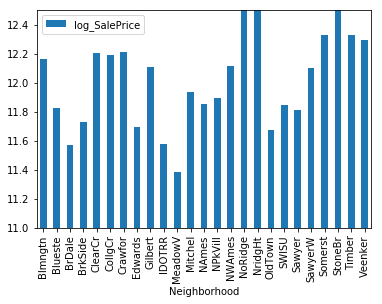

In [212]:
train.pivot_table(index='Neighborhood', 
                         values = 'log_SalePrice', 
                         aggfunc = np.median).plot(kind='bar',ylim=(11,12.5))
print(train.Neighborhood.value_counts())
print(train.Neighborhood.isnull().sum())

In [213]:
train = pd.concat([train, pd.get_dummies(train.Neighborhood, drop_first = True)], axis=1)
train = train.drop('Neighborhood', axis=1)
print(train.shape)

(1448, 116)


In [214]:
test = pd.concat([test, pd.get_dummies(test.Neighborhood, drop_first = True)], axis=1)
test = test.drop('Neighborhood', axis=1)
print(test.shape)

(1459, 115)


## Condition1

Norm      1252
Feedr       80
Artery      47
RRAn        26
PosN        18
RRAe        11
PosA         7
RRNn         5
RRNe         2
Name: Condition1, dtype: int64
0


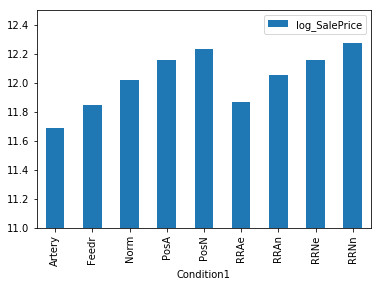

In [215]:
train.pivot_table(index='Condition1', 
                         values = 'log_SalePrice', 
                         aggfunc = np.median).plot(kind='bar',ylim=(11,12.5))
print(train.Condition1.value_counts())
print(train.Condition1.isnull().sum())

In [216]:
train = pd.concat([train, pd.get_dummies(train.Condition1, drop_first = True)], axis=1)
train = train.drop('Condition1', axis=1)
print(train.shape)

(1448, 123)


In [217]:
test = pd.concat([test, pd.get_dummies(test.Condition1, drop_first = True)], axis=1)
test = test.drop('Condition1', axis=1)
print(test.shape)

(1459, 122)


## Condition2

In [218]:
#dropping condition 2, 99% norm
train=train.drop('Condition2', axis=1)
print(train.shape)

(1448, 122)


In [219]:
test=test.drop('Condition2', axis=1)
print(test.shape)

(1459, 121)


## BldgType

1Fam      1210
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      29
Name: BldgType, dtype: int64
0


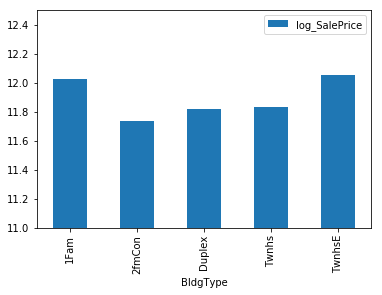

In [220]:
train.pivot_table(index='BldgType', 
                         values = 'log_SalePrice', 
                         aggfunc = np.median).plot(kind='bar',ylim=(11,12.5))
print(train.BldgType.value_counts())
print(train.BldgType.isnull().sum())

In [221]:
train = pd.concat([train, pd.get_dummies(train.BldgType, drop_first = True)], axis=1)
train = train.drop('BldgType', axis=1)
print(train.shape)

(1448, 125)


In [222]:
test = pd.concat([test, pd.get_dummies(test.BldgType, drop_first = True)], axis=1)
test = test.drop('BldgType', axis=1)
print(test.shape)

(1459, 124)


## HouseStyle

1Story    720
2Story    443
1.5Fin    151
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     10
2.5Fin      8
Name: HouseStyle, dtype: int64
0
1Story    745
2Story    427
1.5Fin    160
SLvl       63
SFoyer     46
2.5Unf     13
1.5Unf      5
Name: HouseStyle, dtype: int64
0


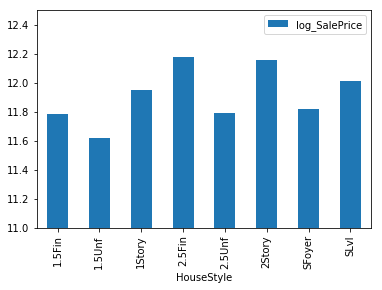

In [223]:
train.pivot_table(index='HouseStyle', 
                         values = 'log_SalePrice', 
                         aggfunc = np.median).plot(kind='bar',ylim=(11,12.5))
print(train.HouseStyle.value_counts())
print(train.HouseStyle.isnull().sum())
print(test.HouseStyle.value_counts())
print(test.HouseStyle.isnull().sum())

In [224]:
train = pd.concat([train, pd.get_dummies(train.HouseStyle, drop_first = True)], axis=1)
train = train.drop('HouseStyle', axis=1)
print(train.shape)

(1448, 131)


In [225]:
test = pd.concat([test, pd.get_dummies(test.HouseStyle, drop_first = True)], axis=1)
test = test.drop('HouseStyle', axis=1)
print(test.shape)

(1459, 129)


## RoofStyle

Gable      1134
Hip         282
Flat         12
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64
0


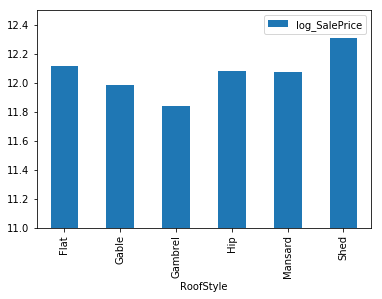

In [226]:
train.pivot_table(index='RoofStyle', 
                         values = 'log_SalePrice', 
                         aggfunc = np.median).plot(kind='bar',ylim=(11,12.5))
print(train.RoofStyle.value_counts())
print(train.RoofStyle.isnull().sum())

In [227]:
train = pd.concat([train, pd.get_dummies(train.RoofStyle, drop_first = True)], axis=1)
train = train.drop('RoofStyle', axis=1)
print(train.shape)

(1448, 135)


In [228]:
test = pd.concat([test, pd.get_dummies(test.RoofStyle, drop_first = True)], axis=1)
test = test.drop('RoofStyle', axis=1)
print(test.shape)

(1459, 133)


## RoofMatl

In [229]:
#drop RoofMatl
train = train.drop('RoofMatl', axis = 1)
print(train.shape)

(1448, 134)


In [230]:
test = test.drop('RoofMatl', axis = 1)
print(test.shape)

(1459, 132)


## Exterior1st

VinylSd    514
HdBoard    222
MetalSd    218
Wd Sdng    202
Plywood    107
CemntBd     60
BrkFace     48
WdShing     26
Stucco      24
AsbShng     20
Stone        2
BrkComm      2
CBlock       1
ImStucc      1
AsphShn      1
Name: Exterior1st, dtype: int64
0


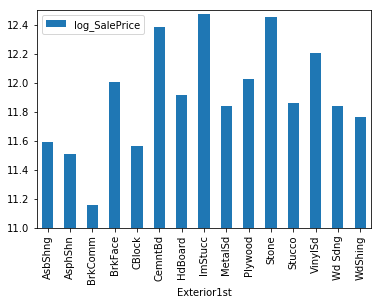

In [231]:
train.pivot_table(index='Exterior1st', 
                         values = 'log_SalePrice', 
                         aggfunc = np.median).plot(kind='bar',ylim=(11,12.5))
print(train.Exterior1st.value_counts())
print(train.Exterior1st.isnull().sum())

In [232]:
train = pd.concat([train, pd.get_dummies(train.Exterior1st, drop_first = True)], axis=1)
train = train.drop('Exterior1st', axis=1)
print(train.shape)

(1448, 147)


In [233]:
test = pd.concat([test, pd.get_dummies(test.Exterior1st, drop_first = True)], axis=1)
test = test.drop('Exterior1st', axis=1)
print(test.shape)

(1459, 143)


## Exterior2nd

In [234]:
#drop 
train=train.drop('Exterior2nd', axis=1)
print(train.shape)

(1448, 146)


In [235]:
test=test.drop('Exterior2nd', axis=1)
print(test.shape)

(1459, 142)


## MasVnrType

In [236]:
train['MasVnrType'] = train['MasVnrType'].fillna(value=train.mode()['MasVnrType'][0])

In [237]:
test['MasVnrType'] = test['MasVnrType'].fillna(value=test.mode()['MasVnrType'][0])

None       865
BrkFace    444
Stone      125
BrkCmn      14
Name: MasVnrType, dtype: int64
0


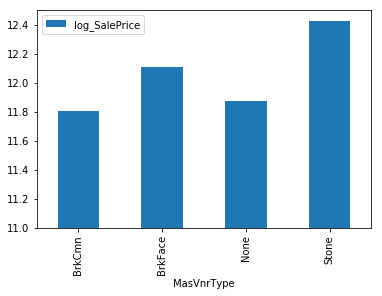

In [238]:
train.pivot_table(index='MasVnrType', 
                         values = 'log_SalePrice', 
                         aggfunc = np.median).plot(kind='bar',ylim=(11,12.5))
print(train.MasVnrType.value_counts())
print(train.MasVnrType.isnull().sum())

In [239]:
train = pd.concat([train, pd.get_dummies(train.MasVnrType, drop_first = True)], axis=1)
train = train.drop('MasVnrType', axis=1)
print(train.shape)

(1448, 148)


In [240]:
test = pd.concat([test, pd.get_dummies(test.MasVnrType, drop_first = True)], axis=1)
test = test.drop('MasVnrType', axis=1)
print(test.shape)

(1459, 144)


## ExterQual

TA    901
Gd    486
Ex     48
Fa     13
Name: ExterQual, dtype: int64
0


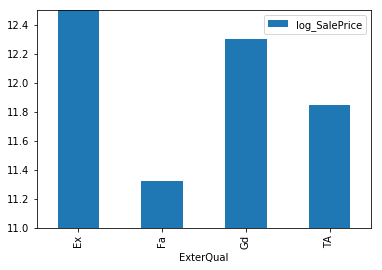

In [241]:
train.pivot_table(index='ExterQual', 
                         values = 'log_SalePrice', 
                         aggfunc = np.median).plot(kind='bar',ylim=(11,12.5))
print(train.ExterQual.value_counts())
print(train.ExterQual.isnull().sum())

In [242]:
train = pd.concat([train, pd.get_dummies(train.ExterQual, drop_first = True)], axis=1)
train = train.drop('ExterQual', axis=1)
print(train.shape)

(1448, 150)


In [243]:
test = pd.concat([test, pd.get_dummies(test.ExterQual, drop_first = True)], axis=1)
test = test.drop('ExterQual', axis=1)
print(test.shape)

(1459, 146)


## ExterCond

TA    1273
Gd     144
Fa      28
Ex       2
Po       1
Name: ExterCond, dtype: int64
0


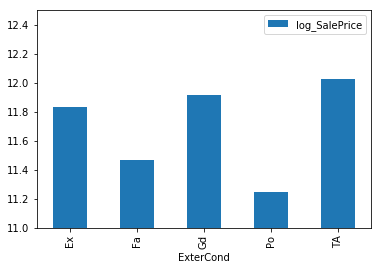

In [244]:
train.pivot_table(index='ExterCond', 
                         values = 'log_SalePrice', 
                         aggfunc = np.median).plot(kind='bar',ylim=(11,12.5))
print(train.ExterCond.value_counts())
print(train.ExterCond.isnull().sum())

In [245]:
train = pd.concat([train, pd.get_dummies(train.ExterCond, drop_first = True)], axis=1)
train = train.drop('ExterCond', axis=1)
print(train.shape)

(1448, 153)


In [246]:
test = pd.concat([test, pd.get_dummies(test.ExterCond, drop_first = True)], axis=1)
test = test.drop('ExterCond', axis=1)
print(test.shape)

(1459, 149)


## Foundation

PConc     644
CBlock    627
BrkTil    144
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64
0


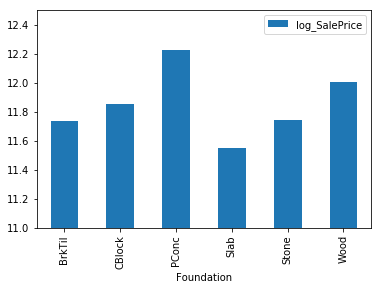

In [247]:
train.pivot_table(index='Foundation', 
                         values = 'log_SalePrice', 
                         aggfunc = np.median).plot(kind='bar',ylim=(11,12.5))
print(train.Foundation.value_counts())
print(train.Foundation.isnull().sum())

In [248]:
def f(x):
 return 1 if x == 'PConc' else 0
train['Foundation'] = train['Foundation'].apply(f)
print(train.Foundation.value_counts())   

0    804
1    644
Name: Foundation, dtype: int64


In [249]:
def g(x):
 return 1 if x == 'PConc' else 0
test['Foundation'] = test['Foundation'].apply(g)
print(test.Foundation.value_counts())   

0    798
1    661
Name: Foundation, dtype: int64


## BsmtQual

In [250]:
train['BsmtQual'] = train['BsmtQual'].fillna(value=train.mode()['BsmtQual'][0])

In [251]:
test['BsmtQual'] = test['BsmtQual'].fillna(value=test.mode()['BsmtQual'][0])

TA    681
Gd    614
Ex    118
Fa     35
Name: BsmtQual, dtype: int64
0


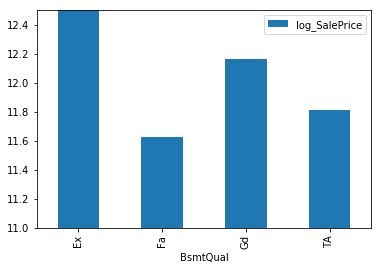

In [252]:
train.pivot_table(index='BsmtQual', 
                         values = 'log_SalePrice', 
                         aggfunc = np.median).plot(kind='bar',ylim=(11,12.5))
print(train.BsmtQual.value_counts())
print(train.BsmtQual.isnull().sum())

In [253]:
train = pd.concat([train, pd.get_dummies(train.BsmtQual, drop_first = True)], axis=1)
train = train.drop('BsmtQual', axis=1)
print(train.shape)

(1448, 155)


In [254]:
test = pd.concat([test, pd.get_dummies(test.BsmtQual, drop_first = True)], axis=1)
test = test.drop('BsmtQual', axis=1)
print(test.shape)

(1459, 151)


## BsmtCond

In [255]:
train['BsmtCond'] = train['BsmtCond'].fillna(value=train.mode()['BsmtCond'][0])
test['BsmtCond'] = test['BsmtCond'].fillna(value=test.mode()['BsmtCond'][0])

TA    1336
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64
0


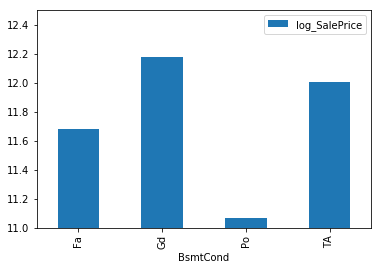

In [256]:
train.pivot_table(index='BsmtCond', 
                         values = 'log_SalePrice', 
                         aggfunc = np.median).plot(kind='bar',ylim=(11,12.5))
print(train.BsmtCond.value_counts())
print(train.BsmtCond.isnull().sum())

In [257]:
train = pd.concat([train, pd.get_dummies(train.BsmtCond, drop_first = True)], axis=1)
train = train.drop('BsmtCond', axis=1)
print(train.shape)

(1448, 157)


In [258]:
test = pd.concat([test, pd.get_dummies(test.BsmtCond, drop_first = True)], axis=1)
test = test.drop('BsmtCond', axis=1)
print(test.shape)

(1459, 153)


## BsmtExposure

In [259]:
train['BsmtExposure'] = train['BsmtExposure'].fillna(value=train.mode()['BsmtExposure'][0])
test['BsmtExposure'] = test['BsmtExposure'].fillna(value=test.mode()['BsmtExposure'][0])

No    986
Av    220
Gd    128
Mn    114
Name: BsmtExposure, dtype: int64
0


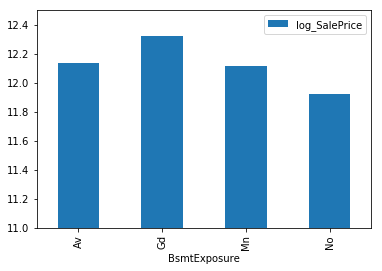

In [260]:
train.pivot_table(index='BsmtExposure', 
                         values = 'log_SalePrice', 
                         aggfunc = np.median).plot(kind='bar',ylim=(11,12.5))
print(train.BsmtExposure.value_counts())
print(train.BsmtExposure.isnull().sum())

In [261]:
train = pd.concat([train, pd.get_dummies(train.BsmtExposure, drop_first = True)], axis=1)
train = train.drop('BsmtExposure', axis=1)
print(train.shape)

(1448, 159)


In [262]:
test = pd.concat([test, pd.get_dummies(test.BsmtExposure, drop_first = True)], axis=1)
test = test.drop('BsmtExposure', axis=1)
print(test.shape)

(1459, 155)


## BsmtFinType1

In [263]:
train['BsmtFinType1'] = train['BsmtFinType1'].fillna(value='No Basement')
test['BsmtFinType1'] = test['BsmtFinType1'].fillna(value='No Basement')

Unf            427
GLQ            415
ALQ            218
BLQ            147
Rec            131
LwQ             73
No Basement     37
Name: BsmtFinType1, dtype: int64
0


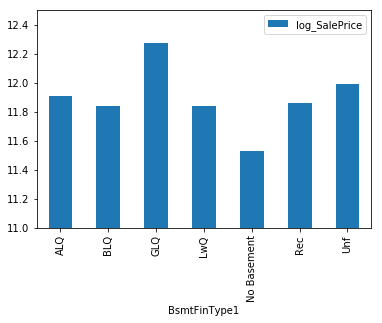

In [264]:
train.pivot_table(index='BsmtFinType1', 
                         values = 'log_SalePrice', 
                         aggfunc = np.median).plot(kind='bar',ylim=(11,12.5))
print(train.BsmtFinType1.value_counts())
print(train.BsmtFinType1.isnull().sum())

In [265]:
train = pd.concat([train, pd.get_dummies(train.BsmtFinType1, drop_first = True)], axis=1)
train = train.drop('BsmtFinType1', axis=1)
print(train.shape)

(1448, 164)


In [266]:
test = pd.concat([test, pd.get_dummies(test.BsmtFinType1, drop_first = True)], axis=1)
test = test.drop('BsmtFinType1', axis=1)
print(test.shape)

(1459, 160)


## BsmtFinType2

In [267]:
train = train.drop('BsmtFinType2', axis=1)
train.shape

(1448, 163)

In [268]:
test = test.drop('BsmtFinType2', axis=1)
test.shape

(1459, 159)

## Heating

In [269]:
# Drop Heating
train = train.drop('Heating', axis=1)
print(train.shape)

(1448, 162)


In [270]:
test = test.drop('Heating', axis=1)
print(test.shape)

(1459, 158)


## HeatingQC

Ex    734
TA    425
Gd    239
Fa     49
Po      1
Name: HeatingQC, dtype: int64
0


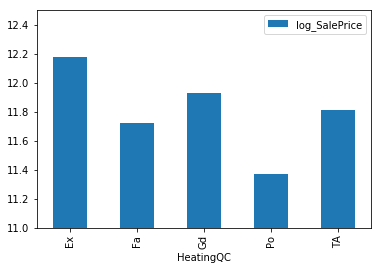

In [271]:
train.pivot_table(index='HeatingQC', 
                         values = 'log_SalePrice', 
                         aggfunc = np.median).plot(kind='bar',ylim=(11,12.5))
print(train.HeatingQC.value_counts())
print(train.HeatingQC.isnull().sum())

In [272]:
train = pd.concat([train, pd.get_dummies(train.HeatingQC, drop_first = True)], axis=1)
train = train.drop('HeatingQC', axis=1)
print(train.shape)

(1448, 165)


In [273]:
test = pd.concat([test, pd.get_dummies(test.HeatingQC, drop_first = True)], axis=1)
test = test.drop('HeatingQC', axis=1)
print(test.shape)

(1459, 161)


## CentralAir

Y    1354
N      94
Name: CentralAir, dtype: int64
0


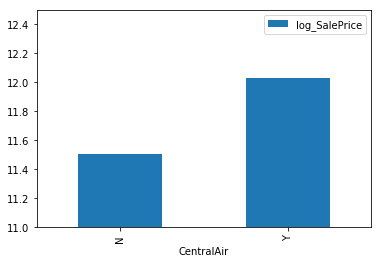

In [274]:
train.pivot_table(index='CentralAir', 
                         values = 'log_SalePrice', 
                         aggfunc = np.median).plot(kind='bar',ylim=(11,12.5))
print(train.CentralAir.value_counts())
print(train.CentralAir.isnull().sum())

In [275]:
def f(x):
 return 1 if x == 'Y' else 0
train['CentralAir'] = train['CentralAir'].apply(f)
print(train.CentralAir.value_counts())  
print(train.shape)

1    1354
0      94
Name: CentralAir, dtype: int64
(1448, 165)


In [276]:
def g(x):
 return 1 if x == 'Y' else 0
test['CentralAir'] = test['CentralAir'].apply(g)
print(test.CentralAir.value_counts())
print(test.shape)

1    1358
0     101
Name: CentralAir, dtype: int64
(1459, 161)


## Electrical

SBrkr    1323
FuseA      93
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64
1


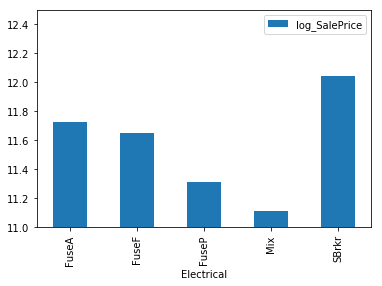

In [277]:
train.pivot_table(index='Electrical', 
                         values = 'log_SalePrice', 
                         aggfunc = np.median).plot(kind='bar',ylim=(11,12.5))
print(train.Electrical.value_counts())
print(train.Electrical.isnull().sum())

In [278]:
def f(x):
 return 1 if x == 'SBrkr' else 0
train['Electrical'] = train['Electrical'].apply(f)
print(train.Electrical.value_counts())   
print(train.shape)

1    1323
0     125
Name: Electrical, dtype: int64
(1448, 165)


In [279]:
def g(x):
 return 1 if x == 'SBrkr' else 0
test['Electrical'] = test['Electrical'].apply(g)
print(train.Electrical.value_counts())   
print(train.shape)

1    1323
0     125
Name: Electrical, dtype: int64
(1448, 165)


## KitchenQual

TA    729
Gd    583
Ex     97
Fa     39
Name: KitchenQual, dtype: int64
0


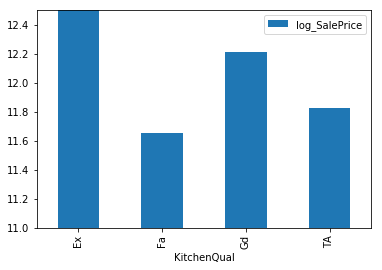

In [280]:
train.pivot_table(index='KitchenQual', 
                         values = 'log_SalePrice', 
                         aggfunc = np.median).plot(kind='bar',ylim=(11,12.5))
print(train.KitchenQual.value_counts())
print(train.KitchenQual.isnull().sum())

In [281]:
train = pd.concat([train, pd.get_dummies(train.KitchenQual, drop_first = True)], axis=1)
train = train.drop('KitchenQual', axis=1)
print(train.shape)

(1448, 167)


In [282]:
test = pd.concat([test, pd.get_dummies(test.KitchenQual, drop_first = True)], axis=1)
test = test.drop('KitchenQual', axis=1)
print(test.shape)

(1459, 163)


## Functional

Typ     1349
Min2      34
Min1      31
Maj1      14
Mod       14
Maj2       5
Sev        1
Name: Functional, dtype: int64
0


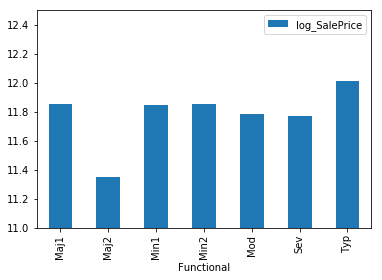

In [283]:
train.pivot_table(index='Functional', 
                         values = 'log_SalePrice', 
                         aggfunc = np.median).plot(kind='bar',ylim=(11,12.5))
print(train.Functional.value_counts())
print(train.Functional.isnull().sum())

In [284]:
def f(x):
 return 1 if x == 'Typ' else 0
train['Electrical'] = train['Electrical'].apply(f)
print(train.Electrical.value_counts())   
print(train.shape)

0    1448
Name: Electrical, dtype: int64
(1448, 167)


In [285]:
def g(x):
 return 1 if x == 'Typ' else 0
test['Electrical'] = test['Electrical'].apply(g)
print(test.Electrical.value_counts())   
print(test.shape)

0    1459
Name: Electrical, dtype: int64
(1459, 163)


## FireplaceQu

In [286]:
train['FireplaceQu'] = train['FireplaceQu'].fillna(value='No Fireplace')
test['FireplaceQu'] = test['FireplaceQu'].fillna(value='No Fireplace')

No Fireplace    688
Gd              373
TA              310
Fa               33
Ex               24
Po               20
Name: FireplaceQu, dtype: int64
0


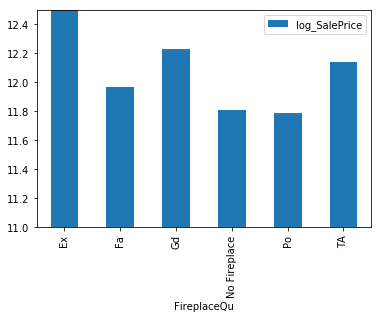

In [287]:
train.pivot_table(index='FireplaceQu', 
                         values = 'log_SalePrice', 
                         aggfunc = np.median).plot(kind='bar',ylim=(11,12.5))
print(train.FireplaceQu.value_counts())
print(train.FireplaceQu.isnull().sum())

In [288]:
train = pd.concat([train, pd.get_dummies(train.FireplaceQu, drop_first = True)], axis=1)
train = train.drop('FireplaceQu', axis=1)
print(train.shape)

(1448, 171)


In [289]:
test = pd.concat([test, pd.get_dummies(test.FireplaceQu, drop_first = True)], axis=1)
test = test.drop('FireplaceQu', axis=1)
print(test.shape)

(1459, 167)


## GarageType

In [290]:
train['GarageType'] = train['GarageType'].fillna(value='No Garage')
test['GarageType'] = test['GarageType'].fillna(value='No Garage')

Attchd       864
Detchd       384
BuiltIn       87
No Garage     80
Basment       19
CarPort        9
2Types         5
Name: GarageType, dtype: int64
0


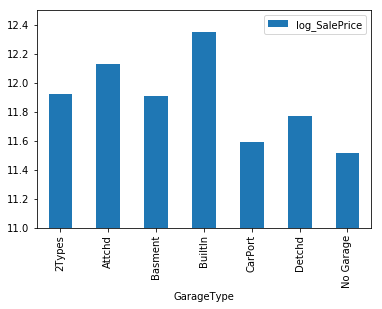

In [291]:
train.pivot_table(index='GarageType', 
                         values = 'log_SalePrice', 
                         aggfunc = np.median).plot(kind='bar',ylim=(11,12.5))
print(train.GarageType.value_counts())
print(train.GarageType.isnull().sum())

In [292]:
train = pd.concat([train, pd.get_dummies(train.GarageType, drop_first = True)], axis=1)
train = train.drop('GarageType', axis=1)
print(train.shape)

(1448, 176)


In [293]:
test = pd.concat([test, pd.get_dummies(test.GarageType, drop_first = True)], axis=1)
test = test.drop('GarageType', axis=1)
print(test.shape)

(1459, 172)


## GarageFinish

In [294]:
train['GarageFinish'] = train['GarageFinish'].fillna(value='No Garage')
test['GarageFinish'] = test['GarageFinish'].fillna(value='No Garage')

Unf          603
RFn          418
Fin          347
No Garage     80
Name: GarageFinish, dtype: int64
0


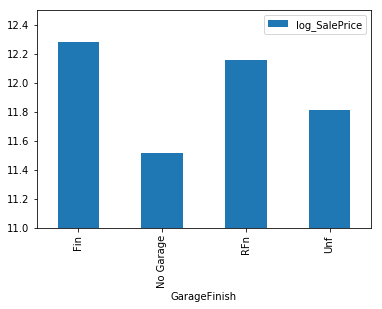

In [295]:
train.pivot_table(index='GarageFinish', 
                         values = 'log_SalePrice', 
                         aggfunc = np.median).plot(kind='bar',ylim=(11,12.5))
print(train.GarageFinish.value_counts())
print(train.GarageFinish.isnull().sum())

In [296]:
train = pd.concat([train, pd.get_dummies(train.GarageFinish, drop_first = True)], axis=1)
train = train.drop('GarageFinish', axis=1)
print(train.shape)

(1448, 178)


In [297]:
test = pd.concat([test, pd.get_dummies(test.GarageFinish, drop_first = True)], axis=1)
test = test.drop('GarageFinish', axis=1)
print(test.shape)

(1459, 174)


## GarageQual

In [298]:
train = train.drop('GarageQual', axis = 1)

In [299]:
test = test.drop('GarageQual', axis = 1)

In [300]:
train.shape

(1448, 177)

## GarageCond

In [301]:
train = train.drop('GarageCond', axis = 1)
print(train.shape)

(1448, 176)


In [302]:
test = test.drop('GarageCond', axis = 1)
print(test.shape)

(1459, 172)


## PavedDrive

Y    1329
N      89
P      30
Name: PavedDrive, dtype: int64
0


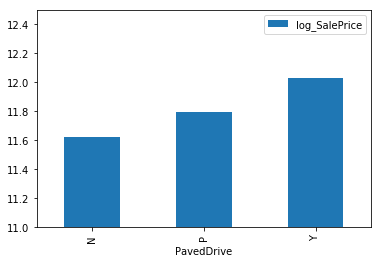

In [303]:
train.pivot_table(index='PavedDrive', 
                         values = 'log_SalePrice', 
                         aggfunc = np.median).plot(kind='bar',ylim=(11,12.5))
print(train.PavedDrive.value_counts())
print(train.PavedDrive.isnull().sum())

In [304]:
train = pd.concat([train, pd.get_dummies(train.PavedDrive, drop_first = True)], axis=1)
train = train.drop('PavedDrive', axis=1)
print(train.shape)

(1448, 177)


In [305]:
test = pd.concat([test, pd.get_dummies(test.PavedDrive, drop_first = True)], axis=1)
test = test.drop('PavedDrive', axis=1)
print(test.shape)

(1459, 173)


## PoolQC

In [306]:
train = train.drop('PoolQC', axis = 1)
print(train.shape)

(1448, 176)


In [307]:
test = test.drop('PoolQC', axis = 1)
print(test.shape)

(1459, 172)


## Fence

In [308]:
train['Fence'] = train['Fence'].fillna(value='No Fence')
test['Fence'] = test['Fence'].fillna(value='No Fence')

No Fence    1169
MnPrv        156
GdPrv         59
GdWo          53
MnWw          11
Name: Fence, dtype: int64
0


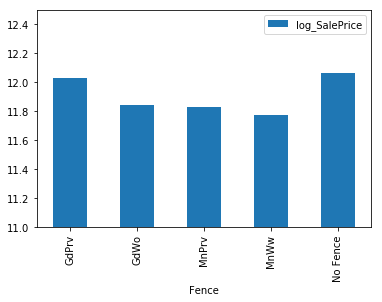

In [309]:
train.pivot_table(index='Fence', 
                         values = 'log_SalePrice', 
                         aggfunc = np.median).plot(kind='bar',ylim=(11,12.5))
print(train.Fence.value_counts())
print(train.Fence.isnull().sum())

In [310]:
train = pd.concat([train, pd.get_dummies(train.Fence, drop_first = True)], axis=1)
train = train.drop('Fence', axis=1)
print(train.shape)

(1448, 179)


In [311]:
test = pd.concat([test, pd.get_dummies(test.Fence, drop_first = True)], axis=1)
test = test.drop('Fence', axis=1)
print(test.shape)

(1459, 175)


## MiscFeature

In [312]:
train = train.drop('MiscFeature', axis=1)
print(train.shape)

(1448, 178)


In [313]:
test = test.drop('MiscFeature', axis=1)
print(test.shape)

(1459, 174)


## SaleType

WD       1259
New       119
COD        43
ConLD       8
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64
0


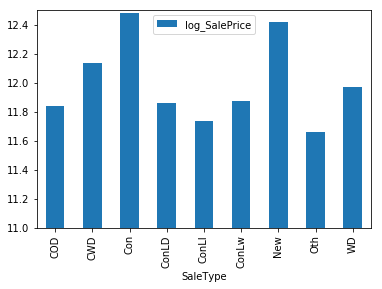

In [314]:
train.pivot_table(index='SaleType', 
                         values = 'log_SalePrice', 
                         aggfunc = np.median).plot(kind='bar',ylim=(11,12.5))
print(train.SaleType.value_counts())
print(train.SaleType.isnull().sum())

In [315]:
def f(x):
 return 1 if x == 'New' else 0
train['SaleType'] = train['SaleType'].apply(f)
print(train.SaleType.value_counts()) 
print(train.shape)

0    1329
1     119
Name: SaleType, dtype: int64
(1448, 178)


In [316]:
def g(x):
 return 1 if x == 'New' else 0
test['SaleType'] = test['SaleType'].apply(g)
print(train.SaleType.value_counts()) 
print(train.shape)

0    1329
1     119
Name: SaleType, dtype: int64
(1448, 178)


## SaleCondition

Normal     1190
Partial     122
Abnorml     100
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64
0


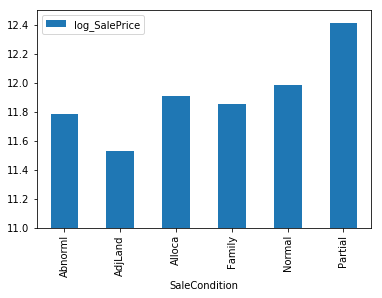

In [317]:
train.pivot_table(index='SaleCondition', 
                         values = 'log_SalePrice', 
                         aggfunc = np.median).plot(kind='bar',ylim=(11,12.5))
print(train.SaleCondition.value_counts())
print(train.SaleCondition.isnull().sum())

In [318]:
train = pd.concat([train, pd.get_dummies(train.SaleCondition, drop_first = True)], axis=1)
train = train.drop('SaleCondition', axis=1)
print(train.shape)

(1448, 182)


In [319]:
test = pd.concat([test, pd.get_dummies(test.SaleCondition, drop_first = True)], axis=1)
test = test.drop('SaleCondition', axis=1)
print(test.shape)

(1459, 178)


## MoSold

6     250
7     233
5     204
4     141
8     119
3     105
10     88
11     77
9      63
12     59
1      57
2      52
Name: MoSold, dtype: int64
0


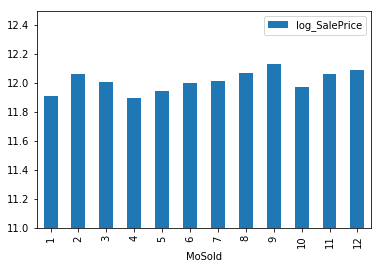

In [320]:
train.pivot_table(index='MoSold', 
                         values = 'log_SalePrice', 
                         aggfunc = np.median).plot(kind='bar',ylim=(11,12.5))
print(train.MoSold.value_counts())
print(train.MoSold.isnull().sum())

In [321]:
train = pd.concat([train, pd.get_dummies(train.MoSold, drop_first = True)], axis=1)
train = train.drop('MoSold', axis=1)
print(train.shape)

(1448, 192)


In [322]:
test = pd.concat([test, pd.get_dummies(test.MoSold, drop_first = True)], axis=1)
test = test.drop('MoSold', axis=1)
print(test.shape)

(1459, 188)


## YrSold

2009    335
2007    326
2006    314
2008    298
2010    175
Name: YrSold, dtype: int64
0


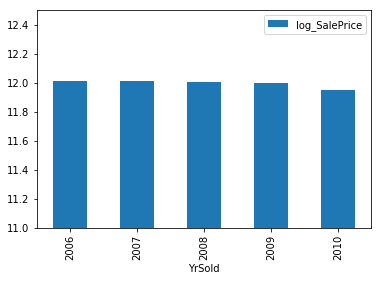

In [323]:
train.pivot_table(index='YrSold', 
                         values = 'log_SalePrice', 
                         aggfunc = np.median).plot(kind='bar',ylim=(11,12.5))
print(train.YrSold.value_counts())
print(train.YrSold.isnull().sum())

In [324]:
train = pd.concat([train, pd.get_dummies(train.YrSold, drop_first = True)], axis=1)
train = train.drop('YrSold', axis=1)
print(train.shape)

(1448, 195)


In [325]:
test = pd.concat([test, pd.get_dummies(test.YrSold, drop_first = True)], axis=1)
test = test.drop('YrSold', axis=1)
print(test.shape)

(1459, 191)


In [326]:
null_vals = pd.DataFrame(train.isnull().sum().sort_values(ascending=False))
null_vals

,0
2010,0
RH,0
MeadowV,0
IDOTRR,0
Gilbert,0
Edwards,0
Crawfor,0
CollgCr,0
ClearCr,0
BrkSide,0


In [327]:
print(train.shape)
print(test.shape)
%store train
%store test

(1448, 195)
(1459, 191)
Stored 'train' (DataFrame)
Stored 'test' (DataFrame)
